# Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data Loading

In [55]:
data_path = "data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [56]:
df = pd.read_csv(data_path, index_col=0)

In [57]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


## Data Preparation

In [75]:
num_feat = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
cat_feat = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']
label = ["Churn"]

In [67]:
# make 0 or na???
remap = {"": 0, " ":0}

In [69]:
df["TotalCharges"] = df["TotalCharges"].replace(remap)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [76]:
for feat in cat_feat:
    s = df[feat].unique()
    print(feat, "=", s)

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [78]:
# One Hot Encode categorical features
df = pd.get_dummies(df)

In [83]:
df = df.drop(labels=["Churn_No"], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13332f9d0>,
      dtype=object)

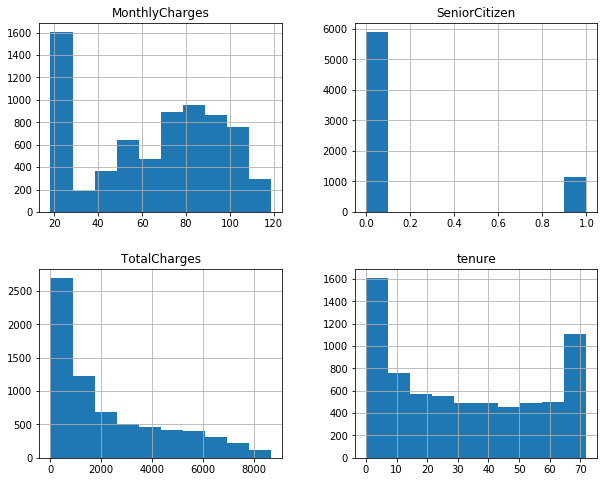

In [86]:
df[num_feat].hist(figsize=(10,8))

In [87]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [90]:
scaler.fit_transform(df[num_feat]).shape

(7043, 4)

In [104]:
df["MonthlyCharges"] = scaler.fit_transform(df["MonthlyCharges"].values.reshape(-1, 1))
df["TotalCharges"] = scaler.fit_transform(df["TotalCharges"].values.reshape(-1, 1))
df["tenure"] = scaler.fit_transform(df["tenure"].values.reshape(-1, 1))

In [105]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,-1.277445,-1.160323,-0.992611,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
5575-GNVDE,0,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3668-QPYBK,0,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
7795-CFOCW,0,0.514251,-0.746535,-0.193672,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
9237-HQITU,0,-1.236724,0.197365,-0.938874,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1337756d0>,
      dtype=object)

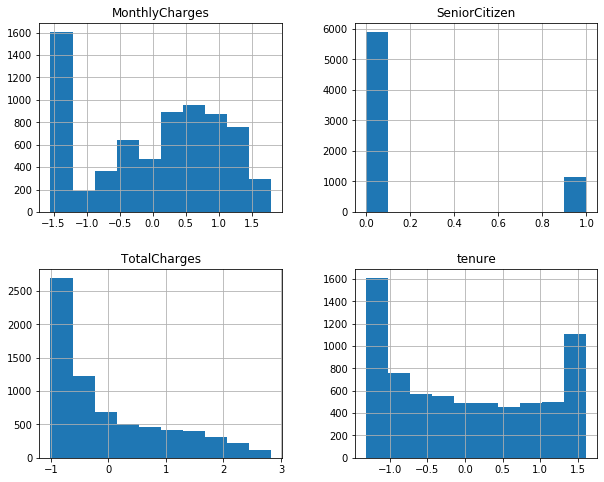

In [106]:
df[num_feat].hist(figsize=(10,8))

## Modeling

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [121]:
y = df["Churn_Yes"]

In [116]:
X = df.drop(labels="Churn_Yes", axis=1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
model = RandomForestClassifier()

In [127]:
model.fit(X_train, y_train)

/Users/patricktu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluation

In [129]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [134]:
acc_tr = np.mean(yhat_train==y_train.values)
acc_tr

0.980288257736329

In [163]:
print(classification_report(y_train.values, yhat_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3477
           1       0.99      0.93      0.96      1241

    accuracy                           0.98      4718
   macro avg       0.98      0.97      0.97      4718
weighted avg       0.98      0.98      0.98      4718



In [136]:
acc_te = np.mean(yhat_test==y_test.values)
acc_te

0.7819354838709678

In [164]:
print(classification_report(y_test.values, yhat_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1697
           1       0.64      0.45      0.52       628

    accuracy                           0.78      2325
   macro avg       0.73      0.68      0.69      2325
weighted avg       0.77      0.78      0.77      2325



## Feature Importance

In [160]:
imp_idx = model.feature_importances_.argsort()[::-1]
imp_feats = X.columns[imp_idx]
print(imp_feats)

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month',
       'TechSupport_No', 'Contract_Two year', 'OnlineSecurity_No',
       'PaymentMethod_Electronic check', 'gender_Female', 'SeniorCitizen',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Partner_Yes',
       'gender_Male', 'DeviceProtection_Yes', 'OnlineBackup_No', 'Partner_No',
       'MultipleLines_No', 'OnlineBackup_Yes', 'Dependents_No',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'StreamingMovies_Yes', 'Dependents_Yes', 'OnlineSecurity_Yes',
       'StreamingTV_Yes', 'InternetService_DSL', 'Contract_One year',
       'MultipleLines_Yes', 'StreamingMovies_No',
       'InternetService_Fiber optic', 'PaymentMethod_Credit card (automatic)',
       'DeviceProtection_No', 'StreamingTV_No', 'TechSupport_Yes',
       'StreamingMovies_No internet service',
       'DeviceProtection_No internet service',
       'MultipleLines_No phone service', 'StreamingTV_No in

In [154]:
importance = sorted(model.feature_importances_)[::-1]

<BarContainer object of 10 artists>

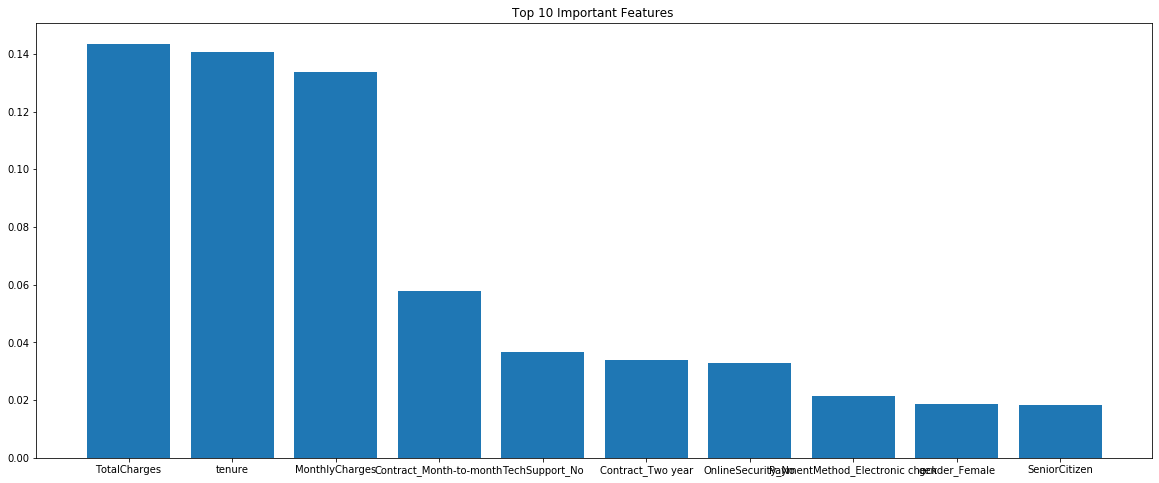

In [159]:
top = 10
plt.figure(figsize=(20,8))
plt.title(f"Top {top} Important Features ")
plt.bar(imp_feats[:top], importance[:top])